# Pipeline de visualisation et EDA - `flood_risk_dataset_india.csv`

Ce notebook explore les facteurs liés à `Flood Occurred` dans `flood_risk_dataset_india.csv`.
Étapes :
- Charger les données
- Vérifier la structure et les valeurs manquantes
- Visualiser le profil de `Flood Occurred` et des variables explicatives
- Explorer les corrélations entre les variables et `Flood Occurred`
- Graphiques détaillés (histogrammes, heatmap, cross-tab, PCA)
- Conclusion et pistes suivantes

In [2]:
# Imports et configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
# Chargement des données (flood_risk_dataset_india.csv)
df = pd.read_csv("datasets/flood_risk_dataset_india.csv")
print('Taille du dataset :', df.shape)
display(df.head())

# Aperçu des types et valeurs manquantes
print('Info:')
display(df.info())
print('Description numérique:')
display(df.describe().T)

# Comptage des valeurs manquantes
missing = df.isnull().sum()
display(missing[missing>0])

Taille du dataset : (10000, 14)


,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                10000 non-null  float64
 1   Longitude               10000 non-null  float64
 2   Rainfall (mm)           10000 non-null  float64
 3   Temperature (°C)        10000 non-null  float64
 4   Humidity (%)            10000 non-null  float64
 5   River Discharge (m³/s)  10000 non-null  float64
 6   Water Level (m)         10000 non-null  float64
 7   Elevation (m)           10000 non-null  float64
 8   Land Cover              10000 non-null  object 
 9   Soil Type               10000 non-null  object 
 10  Population Density      10000 non-null  float64
 11  Infrastructure          10000 non-null  int64  
 12  Historical Floods       10000 non-null  int64  
 13  Flood Occurred          10000 non-null  int64  
dtypes: float64(9), int64(3), object(2

None

Description numérique:


,count,mean,std,min,25%,50%,75%,max
Latitude,10000.0,22.330627,8.341274,8.000337,15.143537,22.283330,29.460184,36.991813
Longitude,10000.0,82.631366,8.389542,68.004575,75.364428,82.671007,89.937897,96.997820
Rainfall (mm),10000.0,150.015118,86.032127,0.014437,76.124373,150.620428,223.402156,299.970293
Temperature (°C),10000.0,29.961401,8.669838,15.000166,22.405717,30.000907,37.413488,44.993681
Humidity (%),10000.0,59.749104,23.142734,20.001339,39.541778,59.497375,80.038163,99.997772
River Discharge (m³/s),10000.0,2515.722946,1441.706442,0.042161,1284.782376,2530.451944,3767.229862,4999.698480
Water Level (m),10000.0,5.017881,2.876579,0.002701,2.538847,5.042094,7.524692,9.996899
Elevation (m),10000.0,4417.138177,2530.245421,1.150340,2229.681903,4417.199761,6616.729066,8846.894877
Population Density,10000.0,5021.468442,2882.591520,2.289000,2491.766601,5074.392879,7474.228752,9999.169530
Infrastructure,10000.0,0.502000,0.500021,0.000000,0.000000,1.000000,1.000000,1.000000


Series([], dtype: int64)

### Vérification de la cible FloodProbability et analyse détaillée des valeurs manquantes

Nous allons examiner la distribution de la cible, le pattern des valeurs manquantes, et la typologie des variables pour guider la modélisation.

Résumé de Flood Occurred:


Flood Occurred
1    5057
0    4943
Name: count, dtype: int64


Nombre de valeurs manquantes dans Flood Occurred: 0


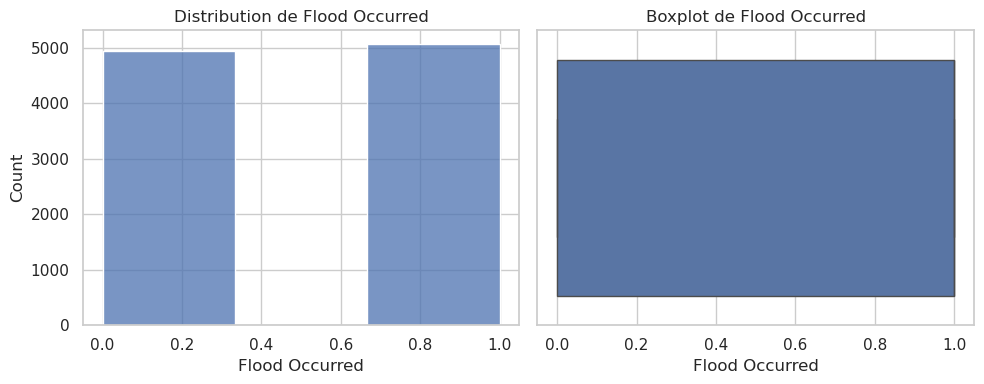

In [4]:
# Vérification de la cible Flood Occurred (classification, flood_risk_dataset_india.csv)
if 'Flood Occurred' not in df.columns:
    raise ValueError("La colonne 'Flood Occurred' est absente du dataset flood_risk_dataset_india.csv.")

print("Résumé de Flood Occurred:")
display(df['Flood Occurred'].value_counts())
print("\nNombre de valeurs manquantes dans Flood Occurred:", df['Flood Occurred'].isna().sum())

# Distribution + boxplot pour la cible
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['Flood Occurred'].dropna(), kde=False, ax=ax[0], bins=3)
ax[0].set_title('Distribution de Flood Occurred')
sns.boxplot(x=df['Flood Occurred'], ax=ax[1])
ax[1].set_title('Boxplot de Flood Occurred')
plt.tight_layout()
plt.show()

In [5]:
# Analyse détaillée des valeurs manquantes (adapté pour flood_risk_dataset_india.csv)
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
})
display(missing_df[missing_df['missing_count'] > 0])

# Heatmap des valeurs manquantes si pertinent
if missing.max() > 0:
    plt.figure(figsize=(10, 4))
    sns.heatmap(df.isnull(), cbar=False)
    plt.title('Pattern des valeurs manquantes (flood_risk_dataset_india.csv)')
    plt.tight_layout()
    plt.show()

,missing_count,missing_pct


In [6]:
# Typologie des variables (adapté pour flood_risk_dataset_india.csv)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print('Colonnes numériques:', num_cols)
print('Colonnes catégorielles:', cat_cols)

cardinality = df[num_cols].nunique().sort_values()
card_df = pd.DataFrame({'nunique': cardinality})
display(card_df)

Colonnes numériques: ['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)', 'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)', 'Population Density', 'Infrastructure', 'Historical Floods', 'Flood Occurred']
Colonnes catégorielles: ['Land Cover', 'Soil Type']


,nunique
Historical Floods,2
Flood Occurred,2
Infrastructure,2
Latitude,10000
Humidity (%),10000
Longitude,10000
Rainfall (mm),10000
Temperature (°C),10000
Elevation (m),10000
Water Level (m),10000


## Visualisations principales
Les graphiques suivants montrent la distribution de la probabilité d'inondation (`FloodProbability`), les distributions des variables explicatives, la matrice de corrélation et des relations directes (scatter + régression) entre les variables les plus corrélées et `FloodProbability`.

In [19]:
# df['predictions_col'] = df['FloodProbability'].apply(lambda x: 1 if x > 0.5 else 0)

# labels = {0: 'Negative', 1: 'Positive'}
# df['predictions_col'].value_counts().plot(
#     kind='pie',
#     autopct='%1.0f%%',
#     shadow=True,
#     explode=[0.02, 0.02],
#     startangle=90,
#     legend=True,
#     title='Flood Predictions',
#     ylabel='',
#     colors=['blue', 'green'],
#     labels=[labels[i] for i in df['predictions_col'].value_counts().index]
# )
# plt.show()

In [20]:
# Distribution de FloodProbability (Plotly interactif, flood_risk_dataset_india.csv)
fig = px.histogram(df, x='FloodProbability', nbins=50, title='Distribution de FloodProbability (flood_risk_dataset_india.csv)')
fig.update_layout(bargap=0.05)
fig.show()

# Colonnes numériques disponibles
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'FloodProbability' in num_cols:
    num_cols.remove('FloodProbability')
print('Colonnes numériques (excluant FloodProbability):', num_cols)

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Latitude', 'Longitude', 'Rainfall (mm)', 'Temperature (°C)', 'Humidity (%)', 'River Discharge (m³/s)', 'Water Level (m)', 'Elevation (m)', 'Land Cover', 'Soil Type', 'Population Density', 'Infrastructure', 'Historical Floods', 'Flood Occurred'] but received: FloodProbability

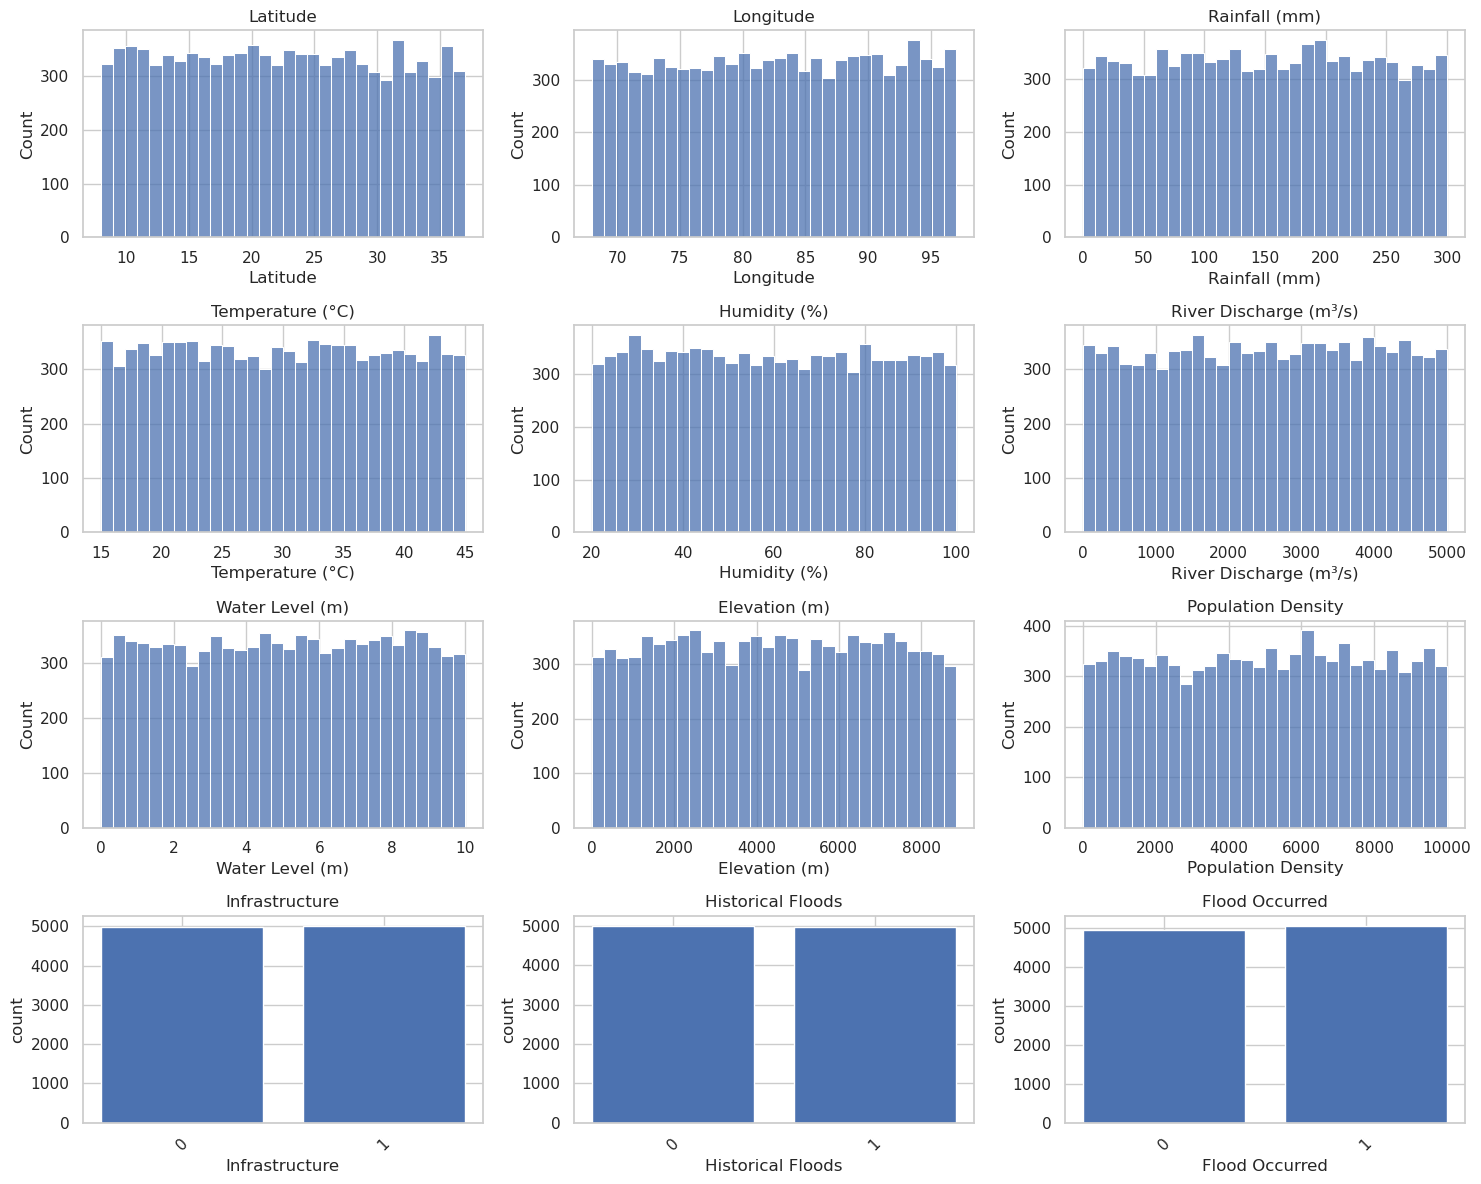

In [21]:
# Histogrammes pour toutes les variables numériques (flood_risk_dataset_india.csv)
num_cols_all = num_cols.copy()
n = len(num_cols_all)
import math
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows))
axes = axes.flatten()
for i, col in enumerate(num_cols_all):
    ax = axes[i]
    values = df[col].dropna()
    nunique = values.nunique()
    # Pour variables discrètes (peu de valeurs uniques) : bar plot sur value_counts
    if (pd.api.types.is_integer_dtype(values) and nunique <= 30) or nunique <= 20:
        vc = values.value_counts().sort_index()
        ax.bar(vc.index.astype(str), vc.values, color='C0')
        ax.set_xlabel(col)
        ax.set_ylabel('count')
        ax.tick_params(axis='x', rotation=45)
    else:
        sns.histplot(values, ax=ax, kde=False, color='C0', bins=30)
        ax.set_xlabel(col)
    ax.set_title(col)
# Supprimer les axes inutilisés
for j in range(i+1, len(axes)):
    try:
        fig.delaxes(axes[j])
    except Exception:
        pass
plt.tight_layout()

### Résumé des distributions des variables explicatives
Nous examinons maintenant les statistiques descriptives, la cardinalité, et le nombre d'outliers (définis par la règle IQR) pour les variables numériques.

In [22]:
# Résumé numérique + détection simple des outliers par variable (règle IQR, flood_risk_dataset_india.csv)
summary = df[num_cols].describe().T

def count_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()

summary['nunique'] = df[num_cols].nunique()
summary['outliers_iqr'] = df[num_cols].apply(count_iqr_outliers)
display(summary.sort_values('outliers_iqr', ascending=False))

,count,mean,std,min,25%,50%,75%,max,nunique,outliers_iqr
Latitude,10000.0,22.330627,8.341274,8.000337,15.143537,22.283330,29.460184,36.991813,10000,0
Longitude,10000.0,82.631366,8.389542,68.004575,75.364428,82.671007,89.937897,96.997820,10000,0
Rainfall (mm),10000.0,150.015118,86.032127,0.014437,76.124373,150.620428,223.402156,299.970293,10000,0
Temperature (°C),10000.0,29.961401,8.669838,15.000166,22.405717,30.000907,37.413488,44.993681,10000,0
Humidity (%),10000.0,59.749104,23.142734,20.001339,39.541778,59.497375,80.038163,99.997772,10000,0
River Discharge (m³/s),10000.0,2515.722946,1441.706442,0.042161,1284.782376,2530.451944,3767.229862,4999.698480,10000,0
Water Level (m),10000.0,5.017881,2.876579,0.002701,2.538847,5.042094,7.524692,9.996899,10000,0
Elevation (m),10000.0,4417.138177,2530.245421,1.150340,2229.681903,4417.199761,6616.729066,8846.894877,10000,0
Population Density,10000.0,5021.468442,2882.591520,2.289000,2491.766601,5074.392879,7474.228752,9999.169530,10000,0
Infrastructure,10000.0,0.502000,0.500021,0.000000,0.000000,1.000000,1.000000,1.000000,2,0


### Diagnostic des distributions et heatmap des fréquences normalisées
Les graphiques précédents montraient des histogrammes similaires car les variables sont des scores entiers sur des plages proches.
Cette cellule calcule un résumé chiffré (min/max/moyenne/std/nunique), affiche les `value_counts` des premières variables et construit une heatmap des fréquences normalisées par valeur
pour mieux visualiser les différences entre colonnes. Enfin, elle affiche la distribution de `FloodProbability` et la corrélation des variables avec la cible.

In [ ]:
# Diagnostic des distributions et visualisations utiles (flood_risk_dataset_india.csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set(style='whitegrid')

summary = pd.DataFrame({
    'min': df[num_cols].min(),
    'max': df[num_cols].max(),
    'mean': df[num_cols].mean(),
    'std': df[num_cols].std(),
    'nunique': df[num_cols].nunique()
})
display(summary.sort_values('nunique'))

# Afficher value_counts des 6 premières variables pour voir les modes
for col in num_cols[:6]:
    print(f"--- {col} (nunique={df[col].nunique()}) ---")
    display(df[col].value_counts().sort_index().head(30))

# Heatmap des fréquences normalisées par valeur (rows = valeurs, cols = variables)
freqs = {}
all_values = set()
for col in num_cols:
    vc = df[col].value_counts().sort_index()
    freqs[col] = vc
    all_values.update(vc.index.tolist())
all_values = sorted(all_values)

freq_df = pd.DataFrame(index=all_values, columns=num_cols).fillna(0).astype(float)
for col in num_cols:
    vc = freqs[col]
    for v, c in vc.items():
        freq_df.at[v, col] = c
# Normaliser par colonne (proportion)
freq_norm = freq_df.div(freq_df.sum(axis=0).replace(0, 1), axis=1)

plt.figure(figsize=(14, max(4, int(len(all_values)/2))))
sns.heatmap(freq_norm, cmap='viridis', cbar_kws={'label':'proportion'})
plt.ylabel('valeur')
plt.xlabel('variable')
plt.title('Fréquences normalisées des valeurs (rows = valeur entière, cols = variable)')
plt.tight_layout()
plt.show()

,min,max,mean,std,nunique
Historical Floods,0.000000,1.000000,0.498700,0.500023,2
Flood Occurred,0.000000,1.000000,0.505700,0.499993,2
Infrastructure,0.000000,1.000000,0.502000,0.500021,2
Latitude,8.000337,36.991813,22.330627,8.341274,10000
Humidity (%),20.001339,99.997772,59.749104,23.142734,10000
Longitude,68.004575,96.997820,82.631366,8.389542,10000
Rainfall (mm),0.014437,299.970293,150.015118,86.032127,10000
Temperature (°C),15.000166,44.993681,29.961401,8.669838,10000
Elevation (m),1.150340,8846.894877,4417.138177,2530.245421,10000
Water Level (m),0.002701,9.996899,5.017881,2.876579,10000


--- Latitude (nunique=10000) ---


Latitude
8.000337    1
8.000891    1
8.001532    1
8.003906    1
8.006584    1
8.006985    1
8.006989    1
8.007045    1
8.011645    1
8.011898    1
8.017340    1
8.018948    1
8.020789    1
8.022896    1
8.026269    1
8.027359    1
8.032251    1
8.037248    1
8.039255    1
8.041422    1
8.042741    1
8.045388    1
8.057772    1
8.068077    1
8.076333    1
8.087605    1
8.090528    1
8.093330    1
8.106033    1
8.107870    1
Name: count, dtype: int64

--- Longitude (nunique=10000) ---


Longitude
68.004575    1
68.007321    1
68.008982    1
68.009575    1
68.016071    1
68.017737    1
68.024757    1
68.027348    1
68.028971    1
68.033233    1
68.034905    1
68.036060    1
68.038276    1
68.038676    1
68.041128    1
68.041346    1
68.050020    1
68.054310    1
68.060339    1
68.062087    1
68.071183    1
68.073299    1
68.097509    1
68.097987    1
68.098136    1
68.098248    1
68.101635    1
68.101815    1
68.102921    1
68.105754    1
Name: count, dtype: int64

--- Rainfall (mm) (nunique=10000) ---


Rainfall (mm)
0.014437    1
0.033070    1
0.037542    1
0.058459    1
0.072265    1
0.073587    1
0.092123    1
0.103310    1
0.152997    1
0.297559    1
0.327462    1
0.372864    1
0.434166    1
0.435095    1
0.495746    1
0.511509    1
0.617106    1
0.624454    1
0.652135    1
0.748636    1
0.756529    1
0.801298    1
0.818623    1
0.825299    1
0.880217    1
0.894039    1
0.933263    1
0.950194    1
0.974378    1
0.981278    1
Name: count, dtype: int64

--- Temperature (°C) (nunique=10000) ---


Temperature (°C)
15.000166    1
15.002025    1
15.002927    1
15.005401    1
15.011991    1
15.017843    1
15.019466    1
15.020714    1
15.024439    1
15.026452    1
15.030814    1
15.037181    1
15.037504    1
15.038876    1
15.040858    1
15.041785    1
15.043950    1
15.045717    1
15.047725    1
15.053159    1
15.056080    1
15.058861    1
15.064803    1
15.066610    1
15.067592    1
15.075263    1
15.078949    1
15.079833    1
15.082789    1
15.085695    1
Name: count, dtype: int64

--- Humidity (%) (nunique=10000) ---


Humidity (%)
20.001339    1
20.007488    1
20.008377    1
20.024881    1
20.039785    1
20.042167    1
20.042227    1
20.044728    1
20.049032    1
20.056401    1
20.068658    1
20.078331    1
20.080978    1
20.114304    1
20.115380    1
20.115557    1
20.128443    1
20.136306    1
20.145623    1
20.147545    1
20.148317    1
20.149071    1
20.161246    1
20.161974    1
20.164163    1
20.177747    1
20.179238    1
20.191207    1
20.193100    1
20.201624    1
Name: count, dtype: int64

--- River Discharge (m³/s) (nunique=10000) ---


River Discharge (m³/s)
0.042161     1
0.234349     1
1.616158     1
1.937065     1
2.870058     1
3.112353     1
3.140964     1
3.148752     1
3.721574     1
3.823832     1
5.107495     1
5.135668     1
5.639889     1
6.169497     1
6.282035     1
6.540998     1
7.273423     1
7.416452     1
7.580141     1
7.598756     1
8.151260     1
8.974177     1
10.344457    1
10.392184    1
10.794204    1
10.861352    1
10.933981    1
11.919036    1
12.069157    1
12.335969    1
Name: count, dtype: int64

/tmp/ipykernel_844860/1505424847.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  freq_df = pd.DataFrame(index=all_values, columns=num_cols).fillna(0).astype(float)


In [7]:
# Matrice de corrélation améliorée : Pearson et Spearman (flood_risk_dataset_india.csv)
import numpy as np
# Sélection des colonnes numériques et conversion en float
num_df = df.select_dtypes(include=[np.number]).astype(float)
# Supprimer colonnes à variance nulle (sinon corr produit NaN)
std = num_df.std()
cols = std[std > 0].index.tolist()
num_df = num_df[cols].copy()

# Calculer Pearson et Spearman
pearson = num_df.corr(method='pearson')
spearman = num_df.corr(method='spearman')

# Corrélations absolues de la cible triées
target_corr_pearson = pearson['FloodProbability'].abs().sort_values(ascending=False)
target_corr_spearman = spearman['FloodProbability'].abs().sort_values(ascending=False)
display(pd.DataFrame({'pearson_abs': target_corr_pearson, 'spearman_abs': target_corr_spearman}))

# Heatmap (masque la moitié supérieure) pour Pearson avec annotations
mask = np.triu(np.ones_like(pearson, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(pearson, mask=mask, cmap='coolwarm', center=0, annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={'shrink': .6})
plt.title('Pearson correlation (upper triangle masked)')
plt.tight_layout()
plt.show()

# Heatmap pour Spearman (ordre monotone) - utile si données ordinales
mask = np.triu(np.ones_like(spearman, dtype=bool))
plt.figure(figsize=(14, 12))
sns.heatmap(spearman, mask=mask, cmap='coolwarm', center=0, annot=True, fmt='.2f',
            linewidths=.5, cbar_kws={'shrink': .6})
plt.title('Spearman correlation (upper triangle masked)')
plt.tight_layout()
plt.show()

# Barplot des top 10 features par corrélation absolue (Pearson) avec la cible
top = target_corr_pearson.drop('FloodProbability').head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top.values, y=top.index, palette='viridis')
plt.xlabel('Absolute Pearson correlation with FloodProbability')
plt.title('Top 10 features by absolute Pearson correlation')
plt.tight_layout()
plt.show()

KeyError: 'FloodProbability'

### Relations FloodProbability vs variables explicatives
Nous visualisons ici les relations entre `FloodProbability` et les variables dont la corrélation absolue est la plus forte avec la cible.

Top variables corrélées (Pearson) avec FloodProbability: ['DeterioratingInfrastructure', 'TopographyDrainage', 'RiverManagement', 'Watersheds']


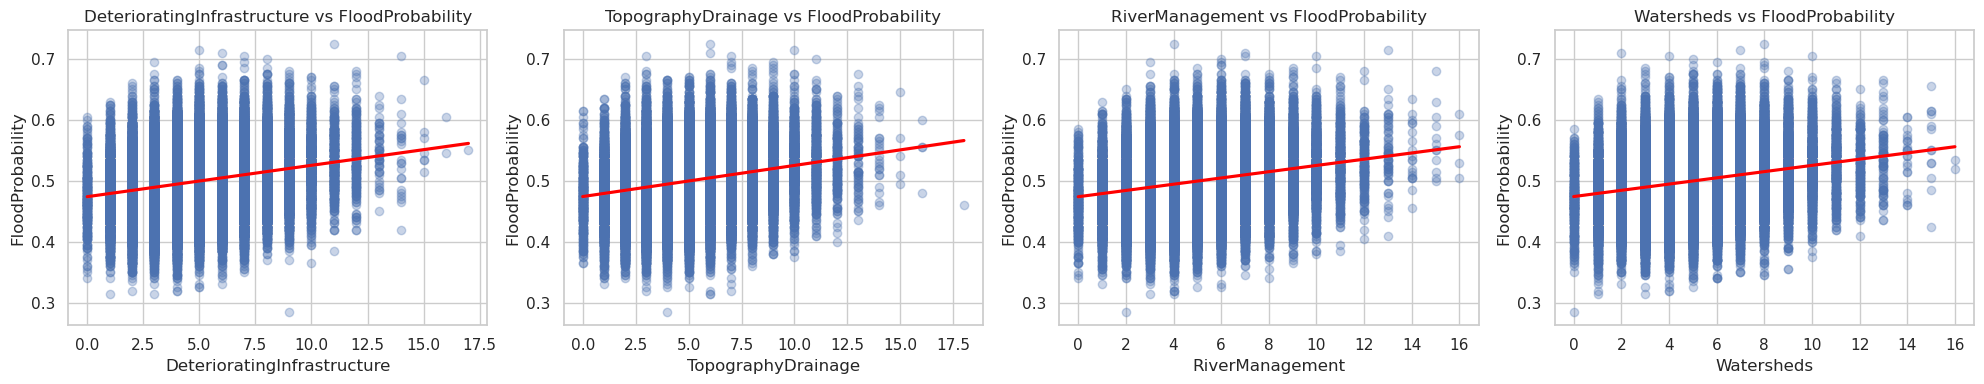

In [ ]:
# Scatter plots avec régression pour les variables les plus corrélées (flood_risk_dataset_india.csv)
# Utilise target_corr_pearson calculé précédemment

target = 'FloodProbability'
top_corr = target_corr_pearson.drop(target).head(4).index.tolist()
print('Top variables corrélées (Pearson) avec FloodProbability:', top_corr)

n = len(top_corr)
fig, axes = plt.subplots(1, n, figsize=(5*n, 4))
if n == 1:
    axes = [axes]

for ax, col in zip(axes, top_corr):
    sns.regplot(data=df, x=col, y=target, ax=ax, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    ax.set_title(f'{col} vs {target}')

plt.tight_layout()
plt.show()

### Multicolinéarité entre variables explicatives
Nous recherchons des groupes de variables très corrélées entre elles, ce qui peut poser des problèmes pour des modèles linéaires non régularisés.

In [ ]:
# Corrélation entre features (hors FloodProbability, flood_risk_dataset_india.csv)
features_only = num_df.drop(columns=['FloodProbability'], errors='ignore')
corr_features = features_only.corr(method='pearson')

# Conserver les paires avec corrélation forte
strong_pairs = []
threshold = 0.8
cols = corr_features.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        val = corr_features.iloc[i, j]
        if abs(val) >= threshold:
            strong_pairs.append((cols[i], cols[j], val))

strong_pairs_df = pd.DataFrame(strong_pairs, columns=['feature_1', 'feature_2', 'corr'])
print('Paires de variables fortement corrélées (|corr| >=', threshold, '):')
display(strong_pairs_df.sort_values('corr', key=lambda s: s.abs(), ascending=False))

Paires de variables fortement corrélées (|corr| >= 0.8 ):


,feature_1,feature_2,corr


Répartition des bandes de risque:


,proportion
FloodRiskBand,
modéré,0.50738
élevé,0.44724
faible,0.02272
très élevé,0.02266


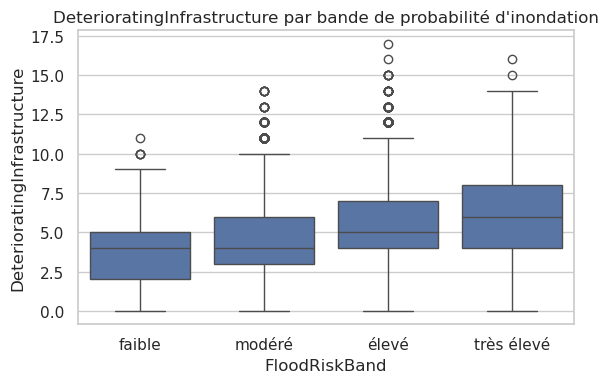

In [ ]:
# Création de bandes de risque pour FloodProbability (flood_risk_dataset_india.csv)
risk_bins = [0, 0.4, 0.5, 0.6, 1.0]
risk_labels = ['faible', 'modéré', 'élevé', 'très élevé']
df['FloodRiskBand'] = pd.cut(df['FloodProbability'], bins=risk_bins, labels=risk_labels, include_lowest=True)

print('Répartition des bandes de risque:')
display(df['FloodRiskBand'].value_counts(normalize=True).rename('proportion').to_frame())

# Exemple: distribution d'une variable explicative par bande de risque
example_col = top_corr[0] if len(top_corr) > 0 else num_cols[0]
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='FloodRiskBand', y=example_col)
plt.title(f'{example_col} par bande de probabilité d\'inondation')
plt.tight_layout()
plt.show()

## Conclusion rapide et prochaines étapes
- `FloodProbability` est une variable continue entre ~0.35 et ~0.63 (selon l'échantillon).
- Le heatmap et `target_corr` montrent quelles variables sont les plus liées à la probabilité d'inondation — ce sont de bonnes candidates pour un modèle prédictif ou pour interprétation.
- Prochaines étapes recommandées :
  - Nettoyage plus fin (gestion des outliers, imputation si besoin).
  - Normalisation / standardisation si vous entraînez un modèle.
  - Essayer un modèle simple (ex: régression linéaire ou arbre) pour évaluer l'importance des variables.
  - Visualisations supplémentaires par segments (ex: clustering, classes binaires de la probabilité).

Souhaitez-vous que j'exécute ce notebook pour vérifier qu'il tourne correctement dans votre environnement?

## Modélisation: Decision Tree et Random Forest

Dans cette section nous allons :
- Entraîner un Decision Tree et un Random Forest pour la tâche de régression (prédire `FloodProbability`)
- Tester aussi une version classification (seuils: 0.5 et quantile) pour comparer les performances
- Afficher les métriques et les importances de variables


### Choix des modèles

À partir de l'EDA:
- `FloodProbability` est une variable continue, légèrement asymétrique, dans une plage relativement restreinte.
- Les variables explicatives sont principalement des scores numériques (souvent entiers) avec des corrélations parfois fortes entre elles.
- Les relations avec la cible semblent globalement monotones, pas forcément strictement linéaires.

Nous testons donc:
- Des modèles **linéaires** (régression linéaire, Ridge) comme baseline, avec standardisation et régularisation pour gérer la multicolinéarité.
- Des modèles **à base d'arbres** (Decision Tree, Random Forest) capables de capturer des non-linéarités et d'interactions entre variables.

Nous comparerons les performances (MSE, RMSE, MAE, R²) et examinerons les résidus et l'importance des variables pour comprendre le comportement des modèles.

In [ ]:
# Préparation des données pour la modélisation (classification Flood Occurred)
# Utilise les résultats EDA pour filtrer les features

target = 'Flood Occurred'
feature_cols = [col for col in df.columns if col not in [target, 'Latitude', 'Longitude', 'Land Cover', 'Soil Type']]

# Sélection des variables numériques uniquement
num_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
X = df[num_cols].copy()
y = df[target]

# Gestion des valeurs manquantes: on enlève les lignes incomplètes
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

print('Shape X, y:', X.shape, y.shape)
print('Features utilisées:', X.columns.tolist())

Shape X, y: (50000, 20) (50000,)
Features utilisées: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']


In [ ]:
# Baseline: Logistic Regression et Random Forest (classification Flood Occurred)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LogisticRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    'RandomForestClassifier': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
    ])
}

results = {}
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    proba = pipe.predict_proba(X_test)[:, 1]
    results[name] = {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred, zero_division=0),
        'Recall': recall_score(y_test, pred, zero_division=0),
        'F1': f1_score(y_test, pred, zero_division=0),
        'ROC-AUC': roc_auc_score(y_test, proba) if len(set(y_test)) > 1 else None
    }

results_df = pd.DataFrame(results).T
print('Résultats classification:')
display(results_df)

Résultats modèles linéaires (baseline):


,MSE,MAE,R2
LinearRegression,7.965030e-33,6.633583e-17,1.0
Ridge(alpha=1.0),1.548388e-12,9.932244e-07,1.0


Résultats modèles arbres:


,MSE,MAE,R2
DecisionTreeRegressor,0.002211,0.037311,0.112346
RandomForestRegressor,0.000666,0.020356,0.732500


/tmp/ipykernel_761877/2036226683.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




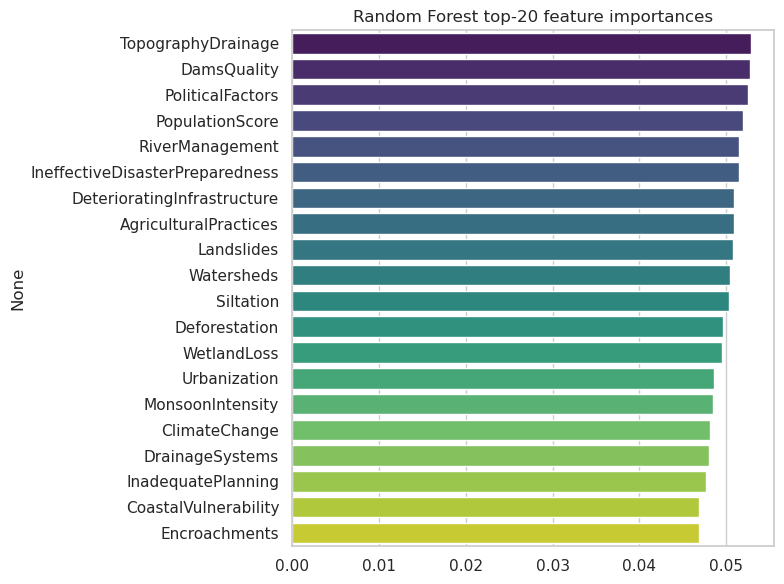

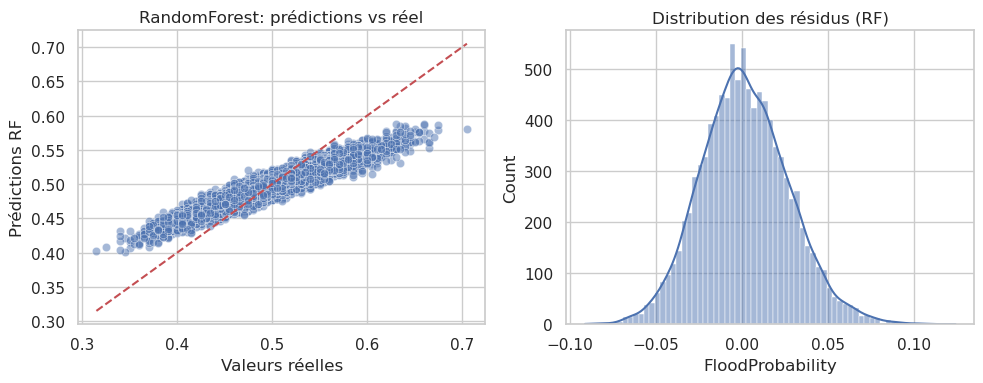

/home/alono/micromamba/envs/satellite/lib/python3.11/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning:

The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.

/home/alono/micromamba/envs/satellite/lib/python3.11/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning:

The column 6 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.

/home/alono/micromamba/envs/satellite/lib/python3.11/site-packages/sklearn

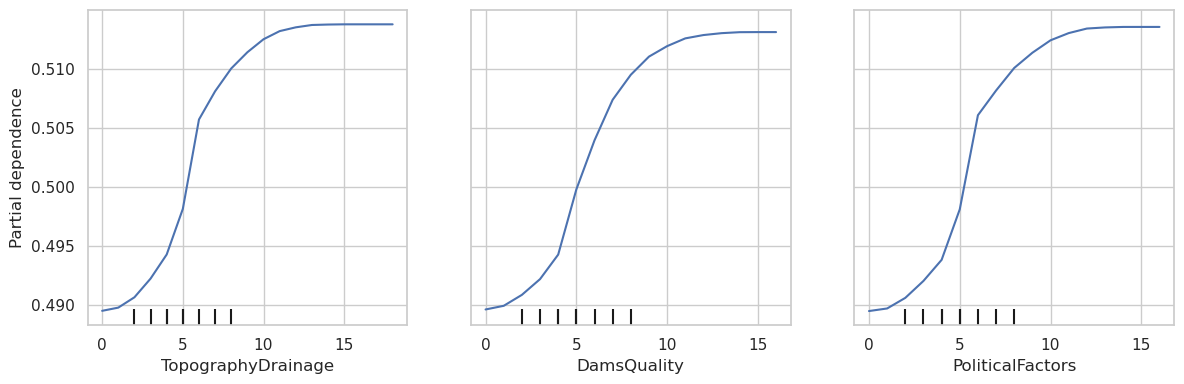

In [ ]:
# Feature importances pour RandomForest (classification Flood Occurred)
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=importances.values[:20], y=importances.index[:20], palette='viridis')
plt.title('Random Forest top-20 feature importances (Flood Occurred)')
plt.tight_layout()
plt.show()

# Analyse des résidus pour RandomForest
rf_pred = rf.predict(X_test)
cm = pd.crosstab(y_test, rf_pred, rownames=['Actual'], colnames=['Predicted'])
print('Confusion matrix:')
display(cm)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest confusion matrix (Flood Occurred)')
plt.tight_layout()
plt.show()

Using features: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']
Regression results:
Regression results:


,MSE,MAE,R2
DecisionTreeRegressor,0.002211,0.037311,0.112346
RandomForestRegressor,0.000666,0.020356,0.732500


/tmp/ipykernel_761877/3119445557.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




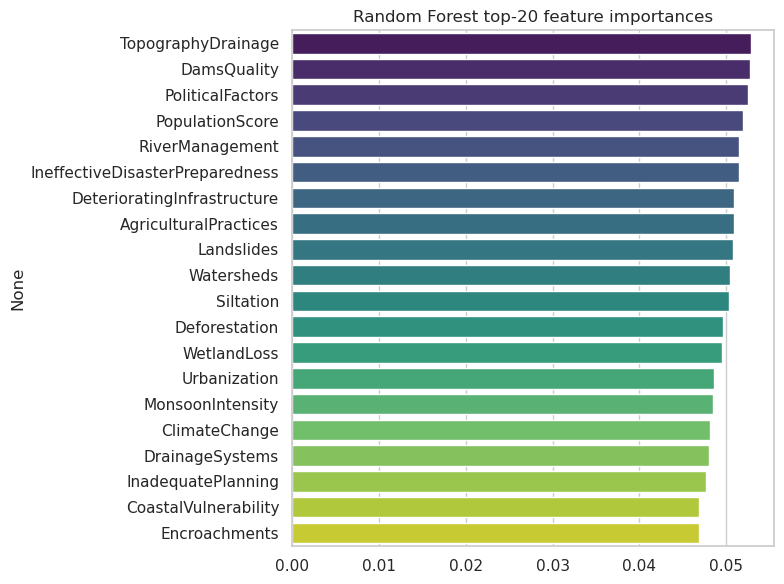

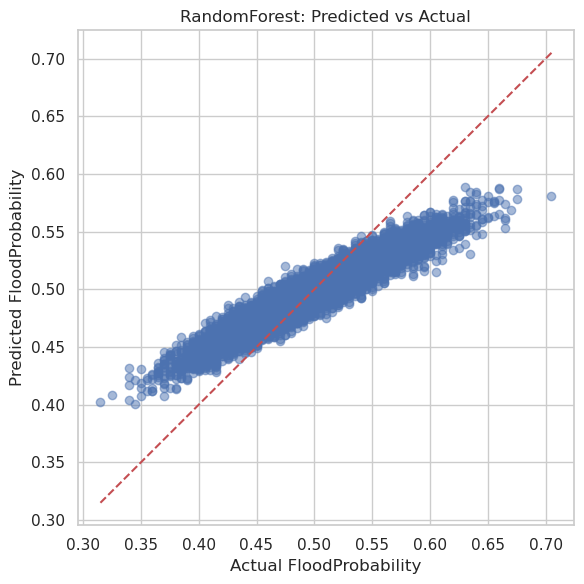

In [ ]:
# Regressors: Decision Tree and Random Forest (predict FloodProbability, flood_risk_dataset_india.csv)
try:
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
except Exception as e:
    print('Please install scikit-learn: pip install scikit-learn')
    raise

# Features selection
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'FloodProbability' in num_cols:
    num_cols.remove('FloodProbability')
# Filter out constant columns
X = df[num_cols].copy()
X = X.loc[:, X.nunique(dropna=True) > 1]
# Target
y = df['FloodProbability']

# Drop rows with missing values in X or y
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

print('Using features:', X.columns.tolist())

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Evaluate
models = {'DecisionTreeRegressor': dt, 'RandomForestRegressor': rf}

results = {}
for name, m in models.items():
    pred = m.predict(X_test)
    results[name] = {
        'MSE': mean_squared_error(y_test, pred),
        'MAE': mean_absolute_error(y_test, pred),
        'R2': r2_score(y_test, pred)
    }

import pandas as pd
res_df = pd.DataFrame(results).T
print('Regression results:')
display(res_df)

# Feature importances for the RandomForest
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=importances.values[:20], y=importances.index[:20], palette='viridis')
plt.title('Random Forest top-20 feature importances')
plt.tight_layout()
plt.show()

# Pred vs actual plot for RandomForest
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual FloodProbability')
plt.ylabel('Predicted FloodProbability')
plt.title('RandomForest: Predicted vs Actual')
plt.tight_layout()
plt.show()

Quantile 0.75 threshold: 0.535

== DecisionTreeClassifier
Accuracy: 0.6914
Precision: 0.6766339171294319
Recall: 0.6683544303797468
F1: 0.6724686902992996
ROC-AUC: 0.6902608653799875

== DecisionTreeClassifier
Accuracy: 0.6914
Precision: 0.6766339171294319
Recall: 0.6683544303797468
F1: 0.6724686902992996
ROC-AUC: 0.6902608653799875

== RandomForestClassifier
Accuracy: 0.9027
Precision: 0.9340861949758009
Recall: 0.8550632911392405
F1: 0.8928296067848882
ROC-AUC: 0.9738147952062377

== RandomForestClassifier
Accuracy: 0.9027
Precision: 0.9340861949758009
Recall: 0.8550632911392405
F1: 0.8928296067848882
ROC-AUC: 0.9738147952062377


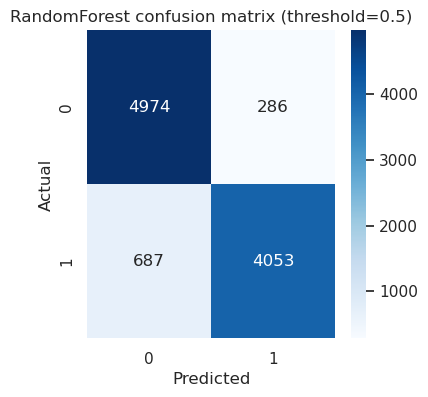


RandomForest (quantile threshold):
Accuracy: 0.841
F1: 0.46500672947510097


In [ ]:
# Classification: Binary labels from FloodProbability (flood_risk_dataset_india.csv)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Create two binary labels: threshold 0.5 and top quartile
if 'FloodProbability' not in df.columns:
    raise ValueError('FloodProbability not found')

threshold = 0.5
y_bin = (df['FloodProbability'] > threshold).astype(int)

q = 0.75
quantile_th = df['FloodProbability'].quantile(q)
print(f"Quantile {q} threshold: {quantile_th:.3f}")
y_bin_q = (df['FloodProbability'] > quantile_th).astype(int)

# Use numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'FloodProbability' in num_cols:
    num_cols.remove('FloodProbability')
X = df[num_cols].copy()
X = X.loc[:, X.nunique(dropna=True) > 1]

# Drop NA rows
mask = X.notnull().all(axis=1) & df['FloodProbability'].notnull()
X = X[mask]

y_bin = y_bin.loc[mask]

y_bin_q = y_bin_q.loc[mask]

# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Fit classifiers
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

clf_rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf_rf.fit(X_train, y_train)

# Evaluate on the 0.5 threshold
for name, model in [('DecisionTreeClassifier', clf_dt), ('RandomForestClassifier', clf_rf)]:
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]
    print('\n==', name)
    print('Accuracy:', accuracy_score(y_test, pred))
    print('Precision:', precision_score(y_test, pred, zero_division=0))
    print('Recall:', recall_score(y_test, pred, zero_division=0))
    print('F1:', f1_score(y_test, pred, zero_division=0))
    if len(np.unique(y_test)) > 1:
        print('ROC-AUC:', roc_auc_score(y_test, proba))

# Confusion matrix for RandomForest
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, clf_rf.predict(X_test))
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForest confusion matrix (threshold=0.5)')
plt.show()

# Optionally evaluate classification for quantile threshold
X_train, X_test, y_train_q, y_test_q = train_test_split(X, y_bin_q, test_size=0.2, random_state=42)
clf_rf_q = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf_rf_q.fit(X_train, y_train_q)
pred_q = clf_rf_q.predict(X_test)
print('\nRandomForest (quantile threshold):')
print('Accuracy:', accuracy_score(y_test_q, pred_q))
print('F1:', f1_score(y_test_q, pred_q, zero_division=0))

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.ensemble import (
    RandomForestRegressor, RandomForestClassifier,
    GradientBoostingRegressor, GradientBoostingClassifier,
    BaggingRegressor, BaggingClassifier
)
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, LogisticRegression
)
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

# =========================
# REGRESSION MODELS
# =========================

regressors = {
    "RandomForestRegressor": RandomForestRegressor(
        n_estimators=100, random_state=42, n_jobs=-1
    ),
    "GradientBoostingRegressor": GradientBoostingRegressor(
        random_state=42
    ),
    "BaggingRegressor": BaggingRegressor(
        random_state=42, n_jobs=-1
    ),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=1e-3, random_state=42),
    "SVR": SVR(),  # RBF kernel by default
    "KNeighborsRegressor": KNeighborsRegressor()
}

print("\n=== REGRESSION: 5-fold CV (RMSE) ===")
for name, model in regressors.items():
    neg_mse = cross_val_score(
        model, X, y,
        scoring='neg_mean_squared_error',
        cv=5, n_jobs=-1
    )
    rmse_scores = np.sqrt(-neg_mse)
    print(f"\n== {name} ==")
    print("RMSE (5-fold):", rmse_scores)
    print("RMSE mean: {:.4f}, std: {:.4f}".format(
        rmse_scores.mean(), rmse_scores.std()
    ))

# Small grids for a few regressors
param_grids_reg = {
    "RandomForestRegressor": {
        "n_estimators": [100, 200],
        "max_depth": [None, 5, 10],
    },
    "GradientBoostingRegressor": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
    },
    "Ridge": {
        "alpha": [0.1, 1.0, 10.0],
    },
    "Lasso": {
        "alpha": [1e-4, 1e-3, 1e-2],
    }
}

print("\n=== REGRESSION: Small GridSearchCV (RMSE) ===")
for name, model in regressors.items():
    if name not in param_grids_reg:
        continue
    print(f"\n-- GridSearch for {name} --")
    gs = GridSearchCV(
        model,
        param_grids_reg[name],
        scoring='neg_mean_squared_error',
        cv=3, n_jobs=-1, verbose=1
    )
    gs.fit(X, y)
    print("Best params:", gs.best_params_)
    print("Best RMSE (cv): {:.4f}".format(np.sqrt(-gs.best_score_)))

# =========================
# CLASSIFICATION MODELS
# =========================

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(
        n_estimators=100, random_state=42, n_jobs=-1
    ),
    "GradientBoostingClassifier": GradientBoostingClassifier(
        random_state=42
    ),
    "BaggingClassifier": BaggingClassifier(
        random_state=42, n_jobs=-1
    ),
    "LogisticRegression": LogisticRegression(
        max_iter=1000, n_jobs=-1
    ),
    "SVC": SVC(probability=True, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier()
}

print("\n=== CLASSIFICATION: 5-fold CV (ROC-AUC) ===")
for name, model in classifiers.items():
    auc_scores = cross_val_score(
        model, X, y_bin,
        scoring='roc_auc',
        cv=5, n_jobs=-1
    )
    print(f"\n== {name} ==")
    print("ROC-AUC (5-fold):", auc_scores)
    print("ROC-AUC mean: {:.4f}, std: {:.4f}".format(
        auc_scores.mean(), auc_scores.std()
    ))

# Small grids for a few classifiers
param_grids_clf = {
    "RandomForestClassifier": {
        "n_estimators": [100, 200],
        "max_depth": [None, 5, 10],
    },
    "GradientBoostingClassifier": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
    },
    "LogisticRegression": {
        "C": [0.1, 1.0, 10.0],
        "penalty": ["l2"],
    }
}

print("\n=== CLASSIFICATION: Small GridSearchCV (ROC-AUC) ===")
for name, model in classifiers.items():
    if name not in param_grids_clf:
        continue
    print(f"\n-- GridSearch for {name} --")
    gs_clf = GridSearchCV(
        model,
        param_grids_clf[name],
        scoring='recall',
        cv=3, n_jobs=-1, verbose=1
    )
    gs_clf.fit(X, y_bin)
    print("Best params:", gs_clf.best_params_)
    print("Best ROC-AUC (cv): {:.4f}".format(gs_clf.best_score_))

347.31s - Error patching args (debugger not attached to subprocess).
Traceback (most recent call last):
  File "/home/alono/.local/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 541, in patch_args
    new_args.append(_get_python_c_args(host, port, code, unquoted_args, SetupHolder.setup))
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/alono/.local/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 193, in _get_python_c_args
    if "__future__" in code:
       ^^^^^^^^^^^^^^^^^^^^
TypeError: a bytes-like object is required, not 'str'
Traceback (most recent call last):
  File "/home/alono/.local/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 541, in patch_args
    new_args.append(_get_python_c_args(host, port, code, unquoted_args, SetupHolder.setup))
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


=== REGRESSION: 5-fold CV (RMSE) ===


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0


== RandomForestRegressor ==
RMSE (5-fold): [0.02619844 0.02542612 0.02568994 0.02604386 0.02595539]
RMSE mean: 0.0259, std: 0.0003

== GradientBoostingRegressor ==
RMSE (5-fold): [0.02367516 0.02299635 0.02323859 0.02347823 0.02322484]
RMSE mean: 0.0233, std: 0.0002

== GradientBoostingRegressor ==
RMSE (5-fold): [0.02367516 0.02299635 0.02323859 0.02347823 0.02322484]
RMSE mean: 0.0233, std: 0.0002

== BaggingRegressor ==
RMSE (5-fold): [0.02870114 0.02816808 0.02833543 0.02862885 0.02847659]
RMSE mean: 0.0285, std: 0.0002

== BaggingRegressor ==
RMSE (5-fold): [0.02870114 0.02816808 0.02833543 0.02862885 0.02847659]
RMSE mean: 0.0285, std: 0.0002

== LinearRegression ==
RMSE (5-fold): [9.05546657e-17 1.04134836e-16 1.92038098e-16 8.13801807e-17
 1.39585988e-16]
RMSE mean: 0.0000, std: 0.0000

== Ridge ==
RMSE (5-fold): [2.54035684e-07 2.45681481e-07 2.48242208e-07 2.51994692e-07
 2.50164008e-07]
RMSE mean: 0.0000, std: 0.0000

== LinearRegression ==
RMSE (5-fold): [9.05546657e-17 1.

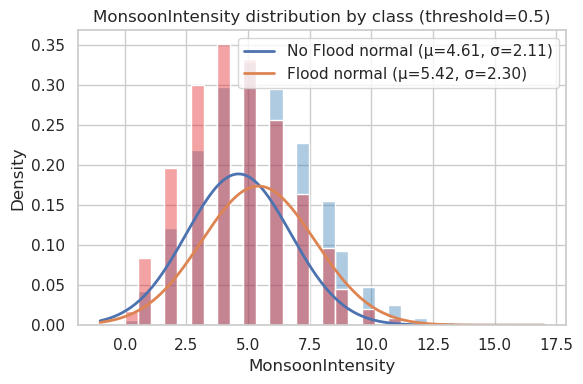

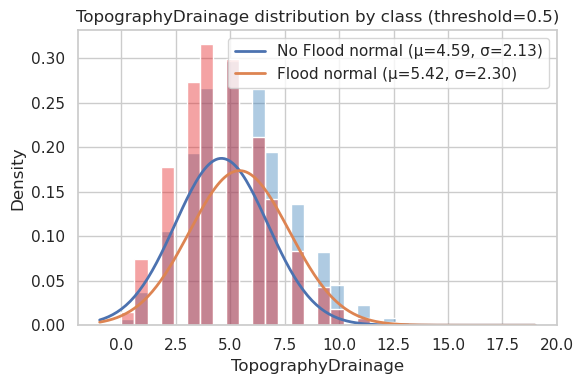

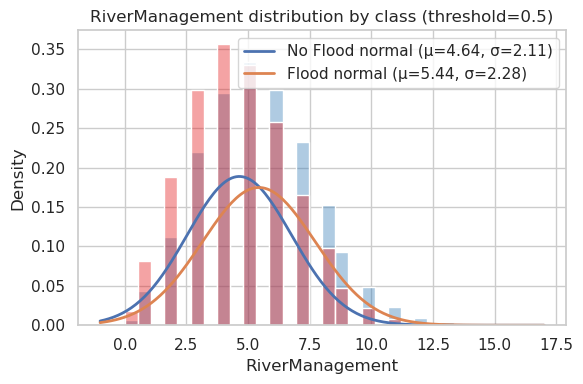

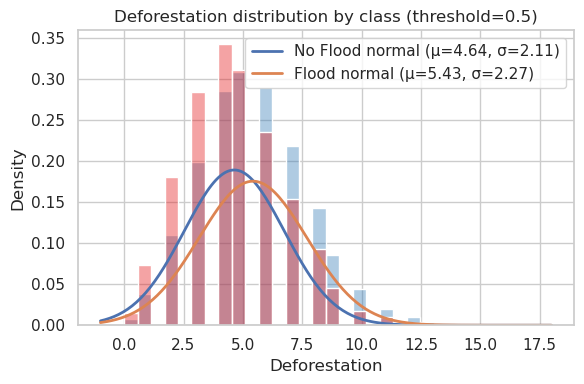

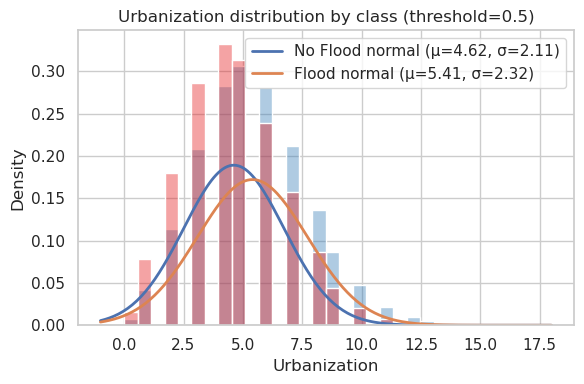

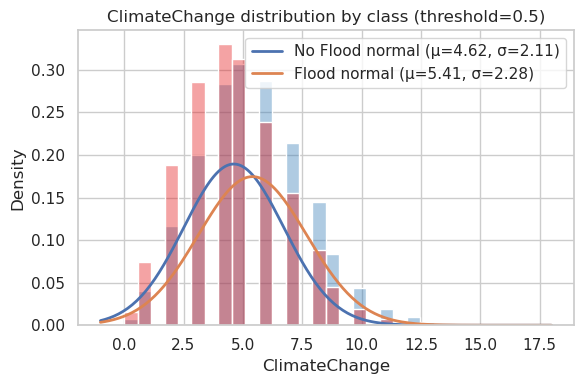

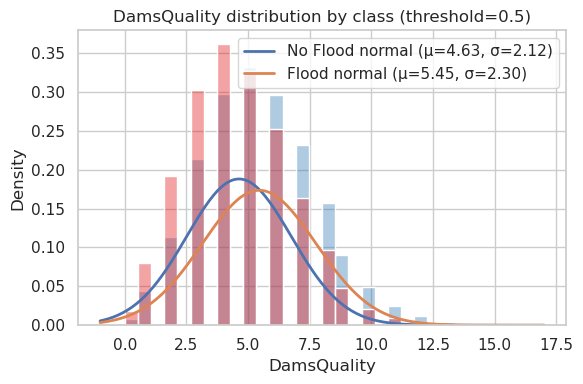

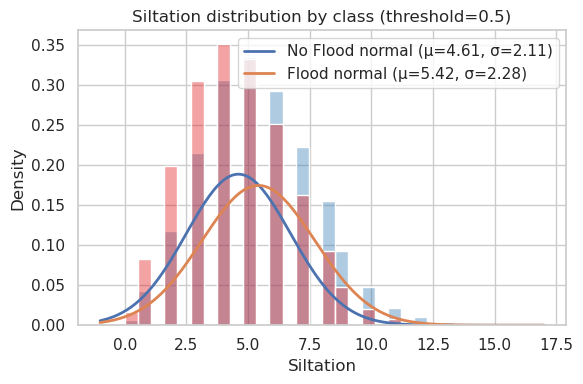

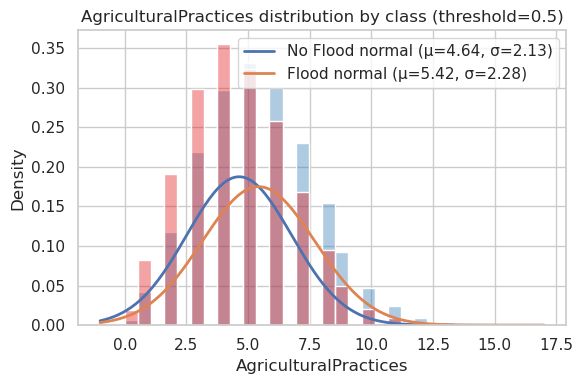

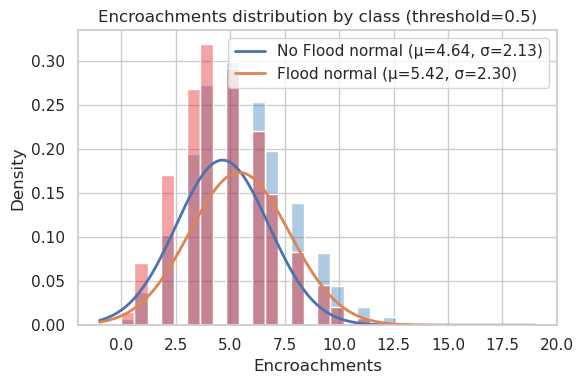

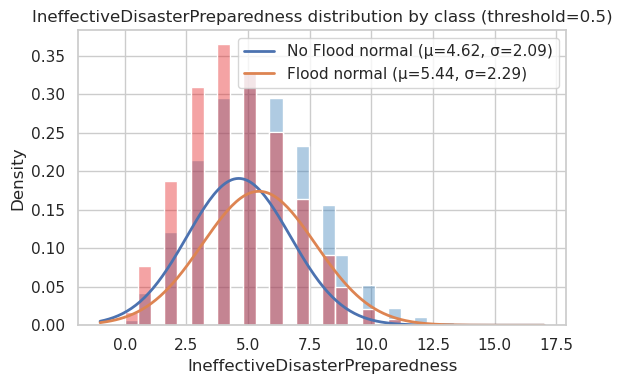

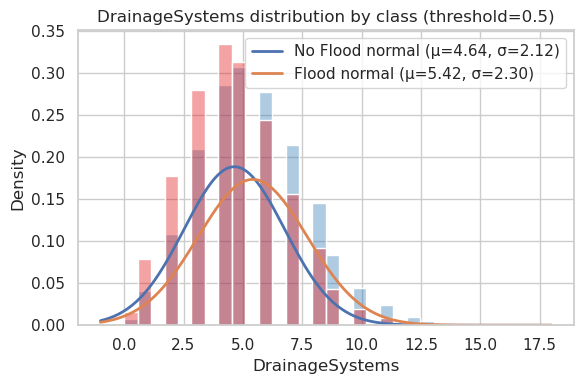

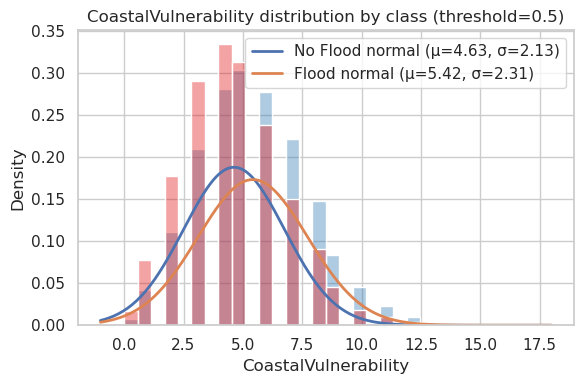

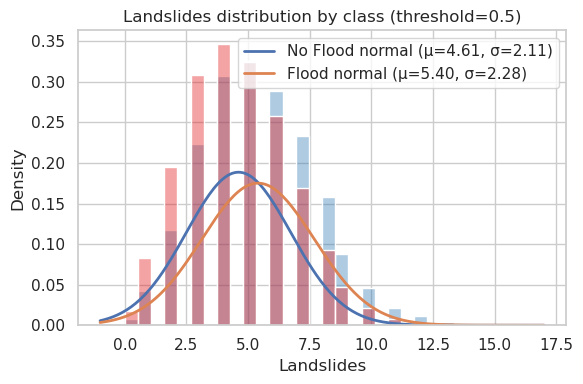

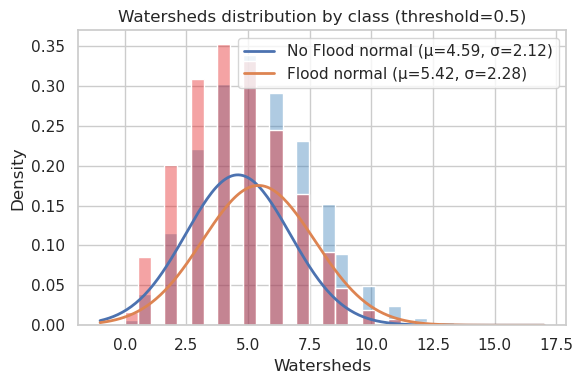

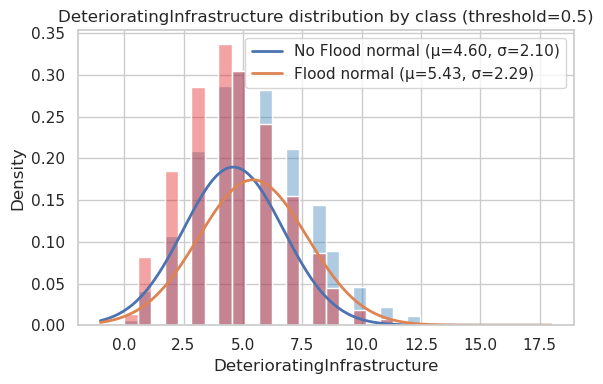

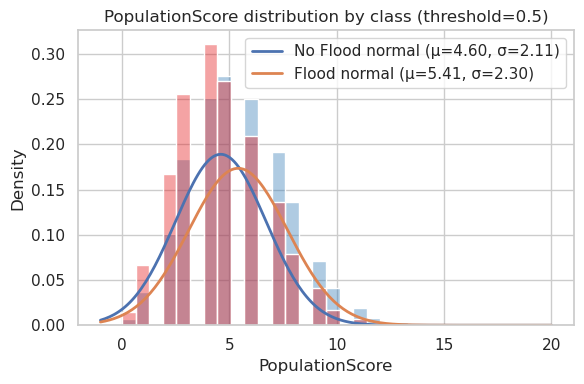

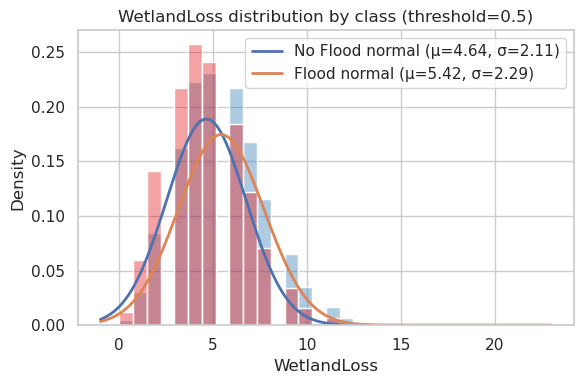

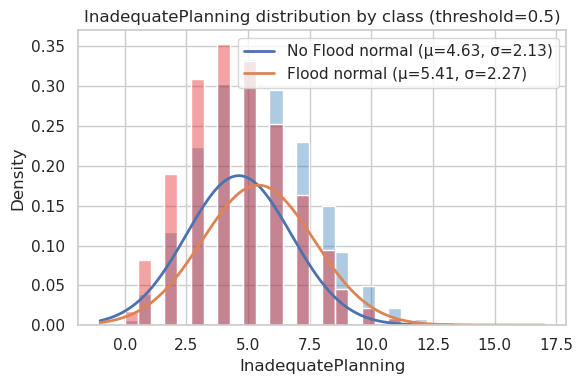

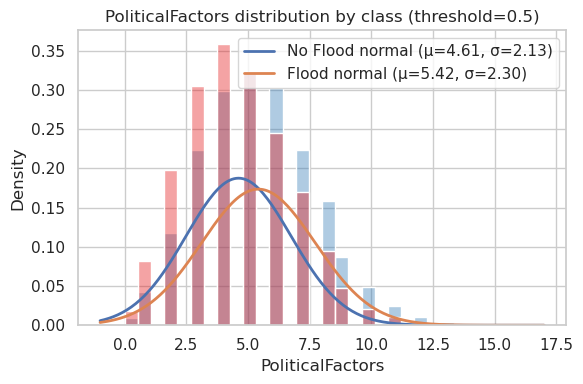

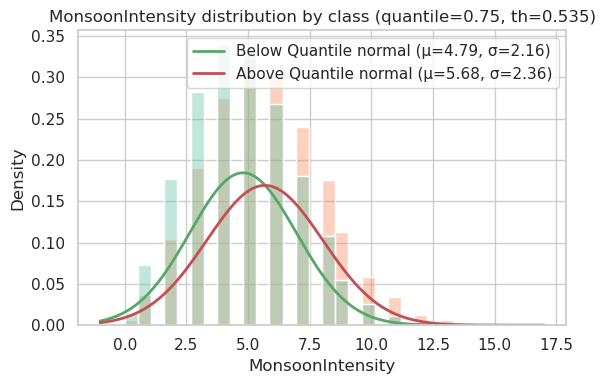

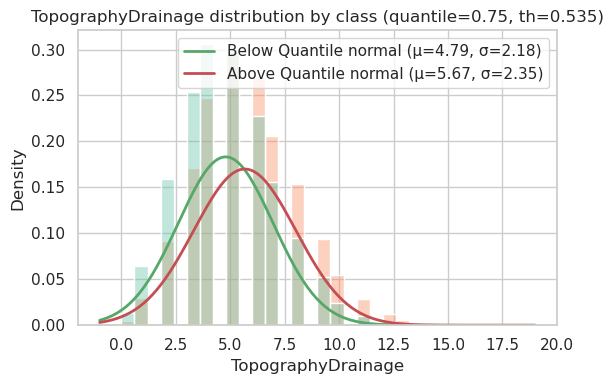

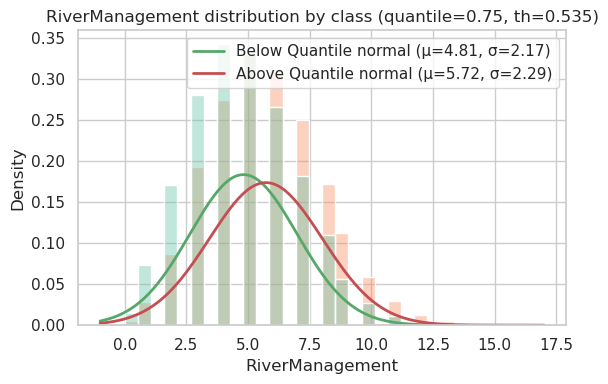

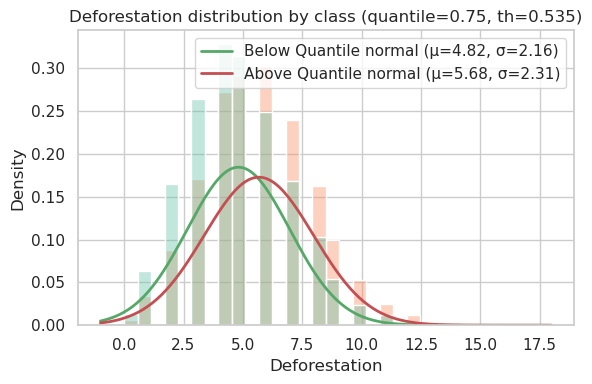

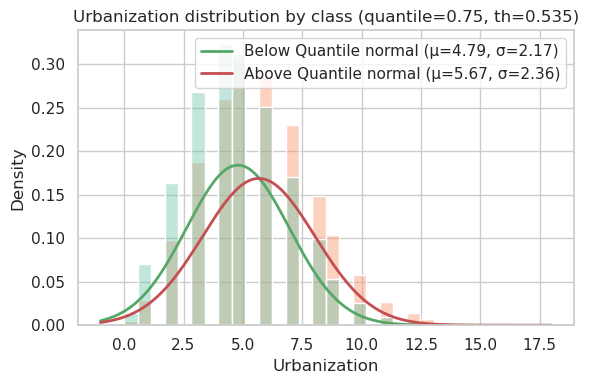

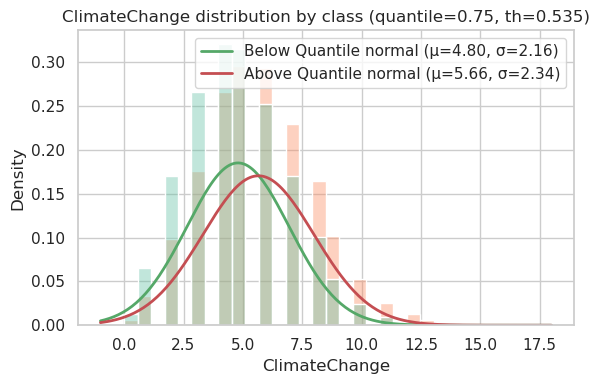

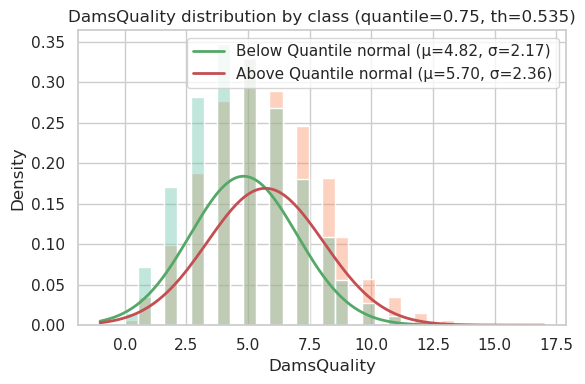

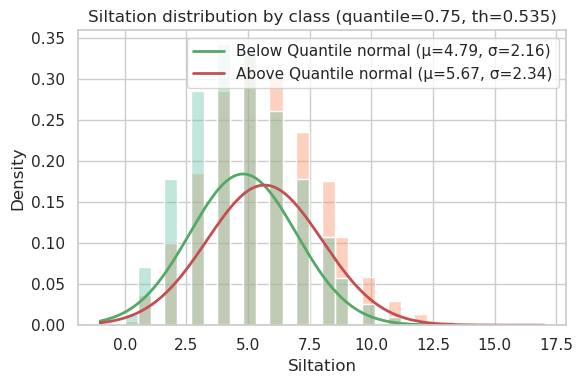

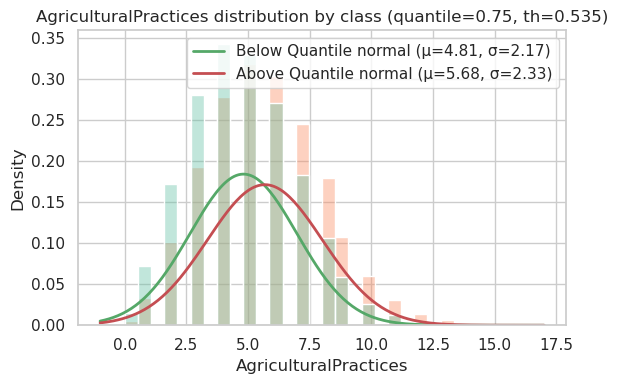

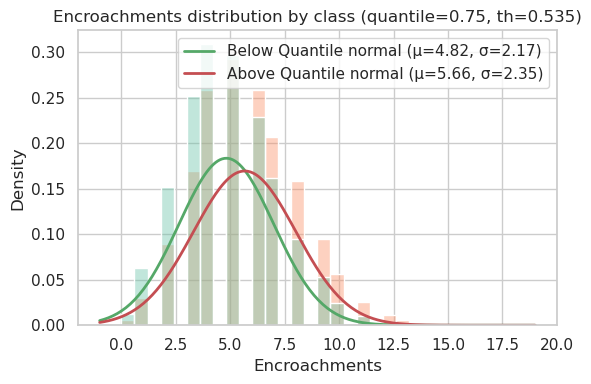

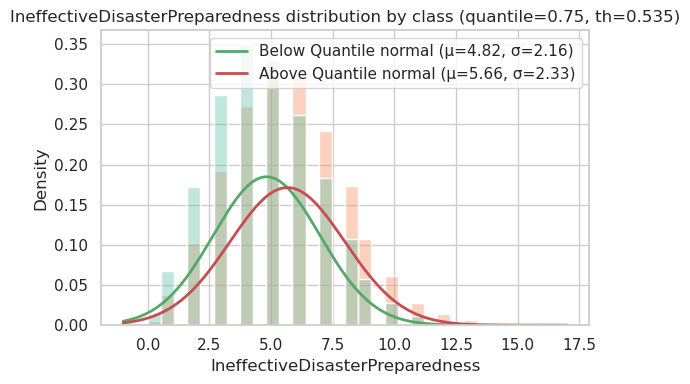

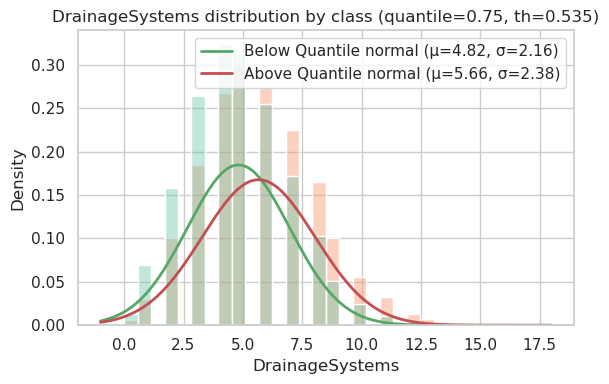

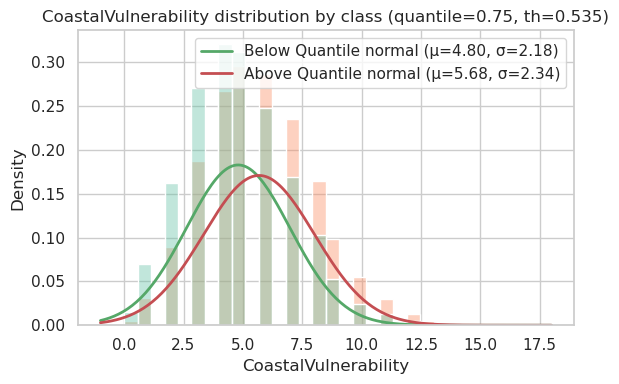

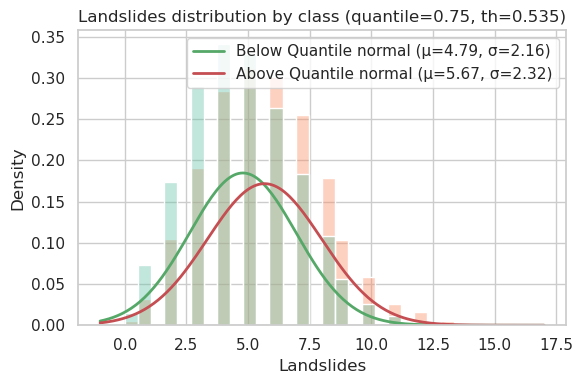

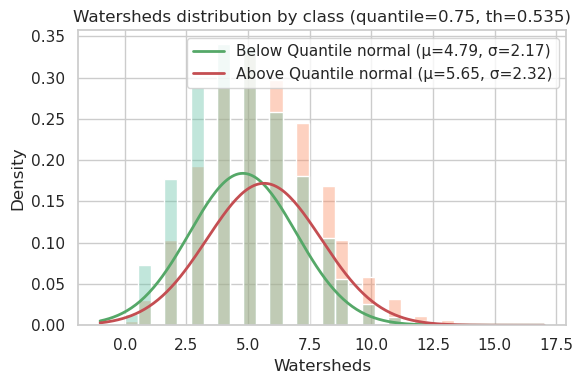

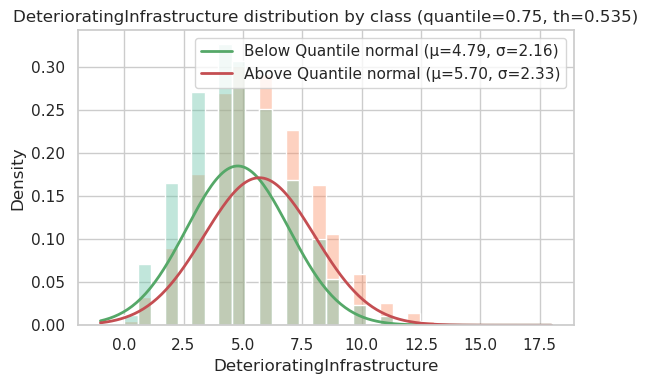

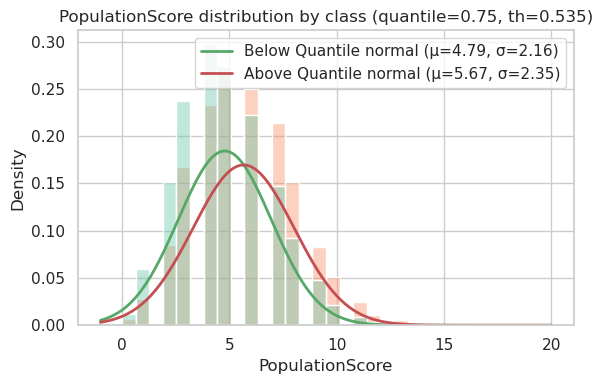

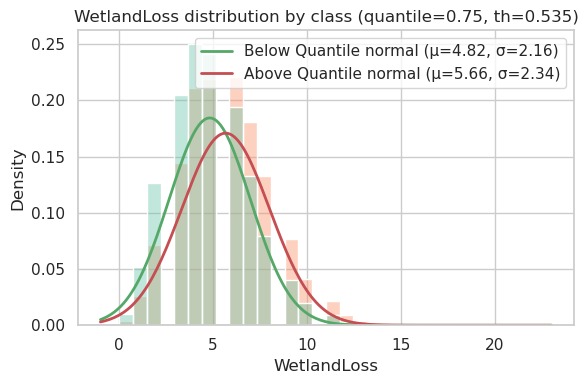

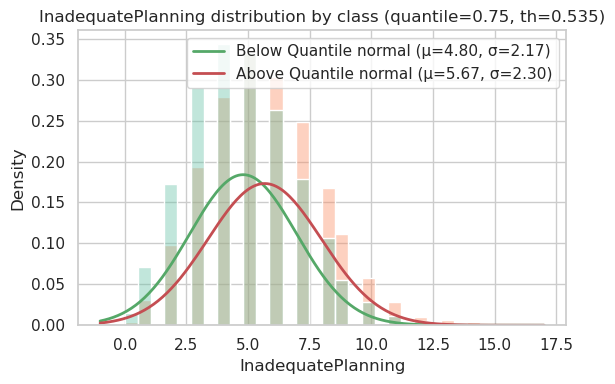

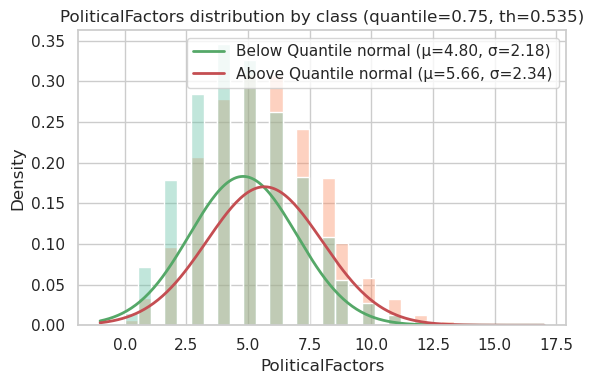

In [ ]:
# Plot each feature grouped by class with a fitted normal (Gaussian) curve instead of KDE (flood_risk_dataset_india.csv)
for col in num_cols:
    plt.figure(figsize=(6, 4))
    # density histogram per class
    sns.histplot(data=df, x=col, hue=y_bin, bins=30, stat='density',
                 palette='Set1', alpha=0.4, element='bars', common_norm=False)
    x_min, x_max = df[col].min(), df[col].max()
    x = np.linspace(x_min - 1, x_max + 1, 200)
    labels = ['No Flood', 'Flood']
    colors = ['C0', 'C1']
    for cls, color in zip([0, 1], colors):
        vals = df.loc[y_bin == cls, col].dropna()
        if len(vals) < 2:
            continue
        mu = vals.mean()
        sigma = vals.std()
        if sigma == 0 or np.isnan(sigma):
            continue
        pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
        plt.plot(x, pdf, color=color, lw=2, label=f'{labels[cls]} normal (μ={mu:.2f}, σ={sigma:.2f})')
    plt.title(f'{col} distribution by class (threshold={threshold})')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Optionally, for quantile threshold (overlay fitted normal per quantile class)
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue=y_bin_q, bins=30, stat='density',
                 palette='Set2', alpha=0.4, element='bars', common_norm=False)
    x_min, x_max = df[col].min(), df[col].max()
    x = np.linspace(x_min - 1, x_max + 1, 200)
    labels_q = ['Below Quantile', 'Above Quantile']
    colors_q = ['C2', 'C3']
    for cls, color in zip([0, 1], colors_q):
        vals = df.loc[y_bin_q == cls, col].dropna()
        if len(vals) < 2:
            continue
        mu = vals.mean()
        sigma = vals.std()
        if sigma == 0 or np.isnan(sigma):
            continue
        pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
        plt.plot(x, pdf, color=color, lw=2, label=f'{labels_q[cls]} normal (μ={mu:.2f}, σ={sigma:.2f})')
    plt.title(f'{col} distribution by class (quantile={q:.2f}, th={quantile_th:.3f})')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

Poids LinearRegression:


CoastalVulnerability               0.011235
TopographyDrainage                 0.011232
PoliticalFactors                   0.011230
DamsQuality                        0.011225
Urbanization                       0.011216
Encroachments                      0.011208
PopulationScore                    0.011191
DrainageSystems                    0.011190
MonsoonIntensity                   0.011184
AgriculturalPractices              0.011173
Siltation                          0.011163
Watersheds                         0.011161
WetlandLoss                        0.011159
RiverManagement                    0.011156
DeterioratingInfrastructure        0.011156
InadequatePlanning                 0.011150
Landslides                         0.011139
ClimateChange                      0.011134
IneffectiveDisasterPreparedness    0.011130
Deforestation                      0.011114
dtype: float64

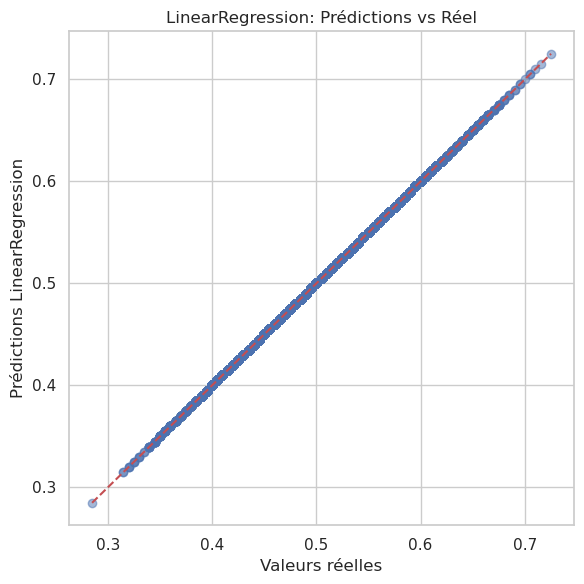

Poids LogisticRegression:


CoastalVulnerability               7.701847
DamsQuality                        7.677734
Encroachments                      7.661737
TopographyDrainage                 7.659653
PoliticalFactors                   7.658558
PopulationScore                    7.654386
Urbanization                       7.632129
DrainageSystems                    7.630795
DeterioratingInfrastructure        7.618320
Watersheds                         7.613678
MonsoonIntensity                   7.613192
AgriculturalPractices              7.610664
Landslides                         7.602217
ClimateChange                      7.598522
WetlandLoss                        7.596985
Siltation                          7.596502
InadequatePlanning                 7.595901
IneffectiveDisasterPreparedness    7.570448
RiverManagement                    7.569554
Deforestation                      7.561556
dtype: float64

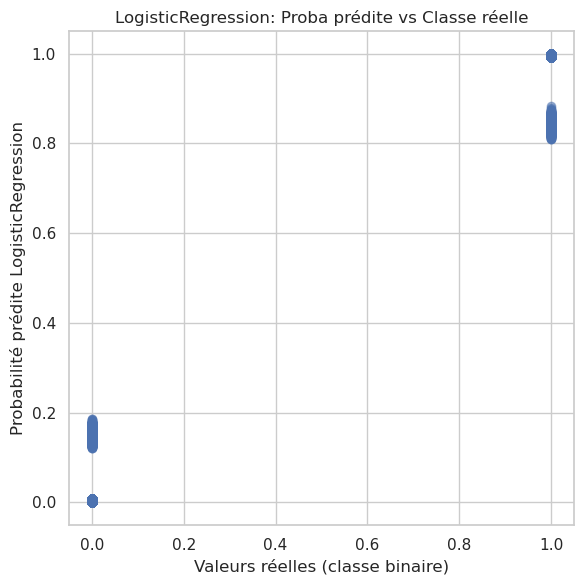

In [ ]:
# Affichage des poids des modèles linéaires et logistiques + plot prédictions vs valeurs réelles (flood_risk_dataset_india.csv)
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Pour la régression linéaire
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linreg = LinearRegression()
linreg.fit(X_scaled, y)
weights_lin = pd.Series(linreg.coef_, index=X.columns)
print('Poids LinearRegression:')
display(weights_lin.sort_values(key=abs, ascending=False))

# Prédictions vs valeurs réelles (régression linéaire)
y_pred_lin = linreg.predict(X_scaled)
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred_lin, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions LinearRegression')
plt.title('LinearRegression: Prédictions vs Réel')
plt.tight_layout()
plt.show()

# Pour la régression logistique (classification binaire, seuil 0.5)
logreg = LogisticRegression(max_iter=1000, n_jobs=-1)
logreg.fit(X_scaled, y_bin)
weights_log = pd.Series(logreg.coef_[0], index=X.columns)
print('Poids LogisticRegression:')
display(weights_log.sort_values(key=abs, ascending=False))

# Prédictions vs valeurs réelles (logistique, proba)
y_pred_log_proba = logreg.predict_proba(X_scaled)[:, 1]
plt.figure(figsize=(6, 6))
plt.scatter(y_bin, y_pred_log_proba, alpha=0.5)
plt.xlabel('Valeurs réelles (classe binaire)')
plt.ylabel('Probabilité prédite LogisticRegression')
plt.title('LogisticRegression: Proba prédite vs Classe réelle')
plt.tight_layout()
plt.show()

### Diagnostics supplémentaires pour les modèles linéaires et logistiques
Ces graphiques comparent les coefficients aux corrélations, examinent les résidus du modèle linéaire, et vérifient la calibration ainsi que la courbe ROC du modèle logistique.

Répartition des signes des coefficients:


,positive,negative,near_zero
lin_coef,20,0,0
log_coef,20,0,0


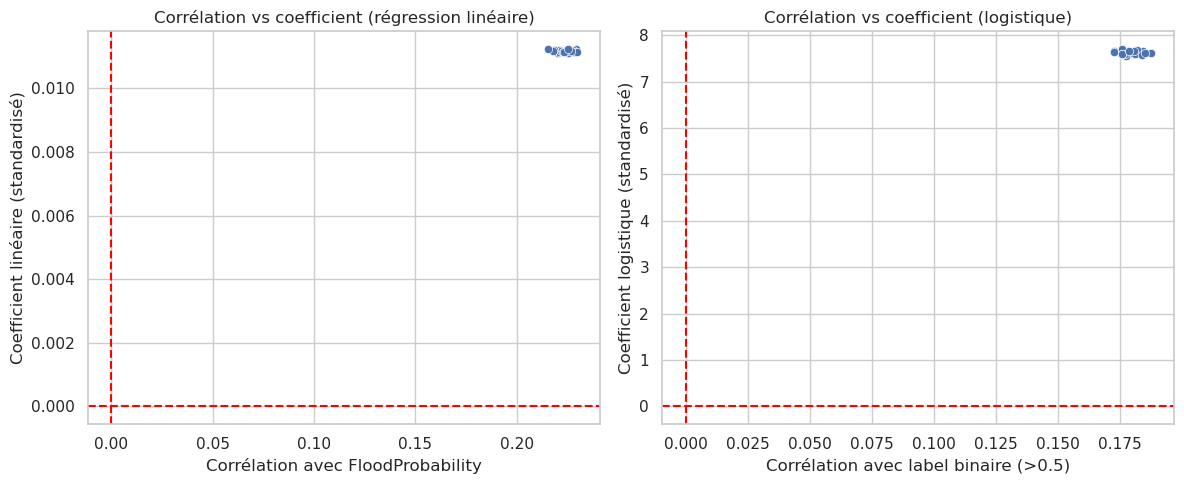

In [ ]:
# Corrélations vs coefficients (linéaire et logistique, flood_risk_dataset_india.csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

coef_df = pd.DataFrame({
    'corr_with_target': X.corrwith(y),
    'corr_with_binary': X.corrwith(y_bin),
    'lin_coef': weights_lin,
    'log_coef': weights_log
}).dropna()

sign_counts = pd.DataFrame({
    'positive': (coef_df[['lin_coef', 'log_coef']] > 0).sum(),
    'negative': (coef_df[['lin_coef', 'log_coef']] < 0).sum(),
    'near_zero': (coef_df[['lin_coef', 'log_coef']].abs() < 1e-6).sum()
})
print('Répartition des signes des coefficients:')
display(sign_counts)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=coef_df, x='corr_with_target', y='lin_coef', ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].axvline(0, color='red', linestyle='--')
axes[0].set_title('Corrélation vs coefficient (régression linéaire)')
axes[0].set_xlabel('Corrélation avec FloodProbability')
axes[0].set_ylabel('Coefficient linéaire (standardisé)')

sns.scatterplot(data=coef_df, x='corr_with_binary', y='log_coef', ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--')
axes[1].axvline(0, color='red', linestyle='--')
axes[1].set_title('Corrélation vs coefficient (logistique)')
axes[1].set_xlabel('Corrélation avec label binaire (>0.5)')
axes[1].set_ylabel('Coefficient logistique (standardisé)')

plt.tight_layout()
plt.show()

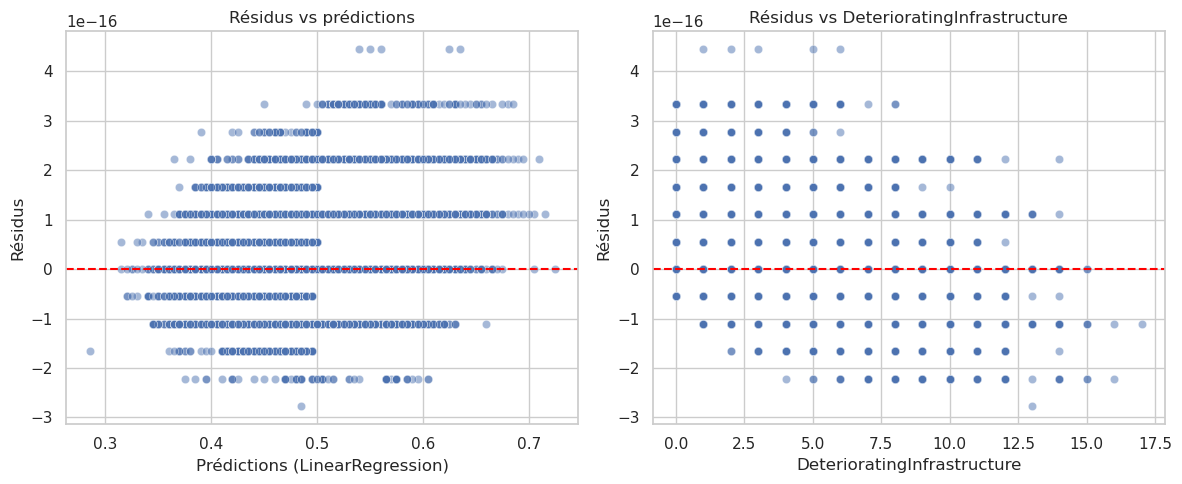

In [ ]:
# Résidus du modèle linéaire (flood_risk_dataset_india.csv)
residuals = y - y_pred_lin
top_feature = coef_df['corr_with_target'].abs().sort_values(ascending=False).index[0] if not coef_df.empty else None
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=y_pred_lin, y=residuals, ax=axes[0], alpha=0.5)
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel('Prédictions (LinearRegression)')
axes[0].set_ylabel('Résidus')
axes[0].set_title('Résidus vs prédictions')

if top_feature is not None:
    sns.scatterplot(x=X[top_feature], y=residuals, ax=axes[1], alpha=0.5)
    axes[1].axhline(0, color='red', linestyle='--')
    axes[1].set_xlabel(top_feature)
    axes[1].set_ylabel('Résidus')
    axes[1].set_title(f"Résidus vs {top_feature}")
else:
    axes[1].text(0.5, 0.5, 'Aucune feature disponible', ha='center', va='center')
    axes[1].set_axis_off()

plt.tight_layout()
plt.show()

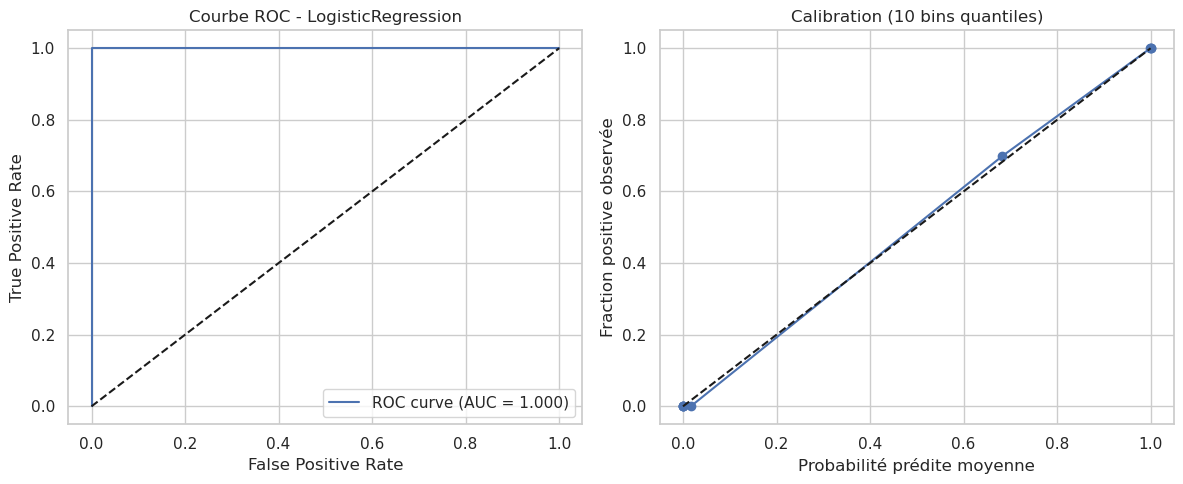

In [ ]:
# Diagnostics du modèle logistique (ROC et calibration, flood_risk_dataset_india.csv)
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import calibration_curve

fpr, tpr, _ = roc_curve(y_bin, y_pred_log_proba)
roc_auc = roc_auc_score(y_bin, y_pred_log_proba)
prob_true, prob_pred = calibration_curve(y_bin, y_pred_log_proba, n_bins=10, strategy='quantile')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Courbe ROC - LogisticRegression')
axes[0].legend(loc='lower right')

axes[1].plot(prob_pred, prob_true, marker='o')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel('Probabilité prédite moyenne')
axes[1].set_ylabel('Fraction positive observée')
axes[1].set_title('Calibration (10 bins quantiles)')

plt.tight_layout()
plt.show()

### Projection PCA et coloration par `FloodProbability`
Cette section projette les features normalisées sur les deux premières composantes principales et colore les points selon la probabilité d'inondation.

Variance expliquée PC1: 0.052046806905545875
Variance expliquée PC2: 0.05168289627690509
Variance cumulée: 0.10372970318245096


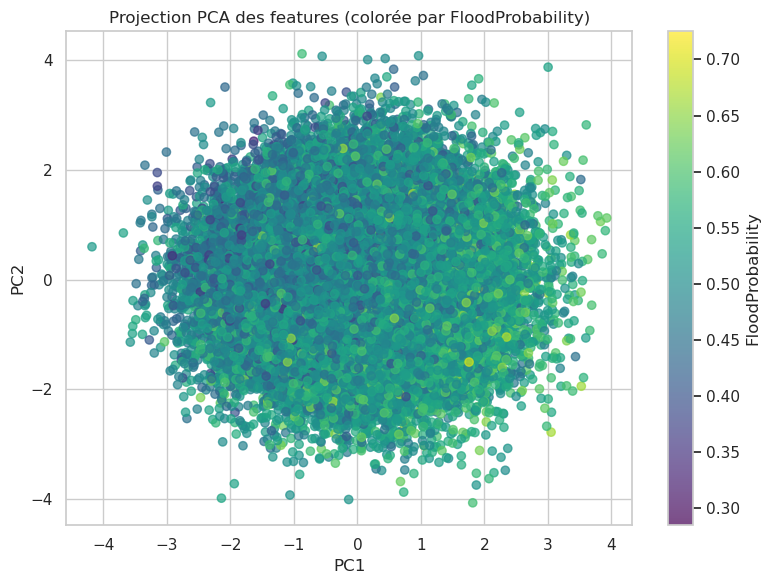

In [ ]:
# PCA sur les features numériques et scatter coloré par FloodProbability (flood_risk_dataset_india.csv)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# S'assurer que les features et la cible sont alignées
X_valid = X.copy()
y_continuous = y.loc[X_valid.index]

scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_valid)
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(X_pca_scaled)
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'], index=X_valid.index)
pca_df['FloodProbability'] = y_continuous

print('Variance expliquée PC1:', pca.explained_variance_ratio_[0])
print('Variance expliquée PC2:', pca.explained_variance_ratio_[1])
print('Variance cumulée:', pca.explained_variance_ratio_.sum())

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=pca_df['FloodProbability'],
    cmap='viridis',
    alpha=0.7
 )
cbar = plt.colorbar(scatter)
cbar.set_label('FloodProbability')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection PCA des features (colorée par FloodProbability)')
plt.tight_layout()
plt.show()